In [26]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
import wittgenstein as lw
#pca
from sklearn.decomposition import PCA

In [27]:
EngyTime = pd.read_csv('../data/EngyTime_Data.csv')
EngyTime_labels = pd.read_csv('../data/EngyTime_Labels.csv')

In [28]:
scaler = StandardScaler()
EngyTime_scaled = scaler.fit_transform(EngyTime)
EngyTime = pd.DataFrame(EngyTime_scaled, columns=EngyTime.columns)
models = []
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(EngyTime)
models.append({'model': kmeans, 'name': 'KMeans', 'labels': kmeans_labels})
print('Kmeans Silhouette Score:', silhouette_score(EngyTime, kmeans_labels), "Number of Clusters:", len(np.unique(kmeans_labels)))

agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(EngyTime)
models.append({'model': agg, 'name': 'Agglomerative', 'labels': agg_labels})
print('Agglomerative Silhouette Score:', silhouette_score(EngyTime, agg_labels), "Number of Clusters:", len(np.unique(agg_labels)))


Kmeans Silhouette Score: 0.41344253100667167 Number of Clusters: 2
Agglomerative Silhouette Score: 0.40790823660410674 Number of Clusters: 2


## Lime

In [29]:
clustterToExplain = 1
i = 100 # instance to explain

#KMeans
y = (kmeans_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(EngyTime, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(EngyTime, y)
print('KMeans Accuracy:', accuracy_score(y, clf.predict(EngyTime)))
explainer = LimeTabularExplainer(EngyTime.values, mode='classification', feature_names=EngyTime.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(EngyTime.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#Agglomerative
y = (agg_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(EngyTime, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(EngyTime, y)
print('Agglomerative Accuracy:', accuracy_score(y, clf.predict(EngyTime)))
explainer = LimeTabularExplainer(EngyTime.values, mode='classification', feature_names=EngyTime.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(EngyTime.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

KMeans Accuracy: 0.997802734375


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Agglomerative Accuracy: 0.9814453125


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

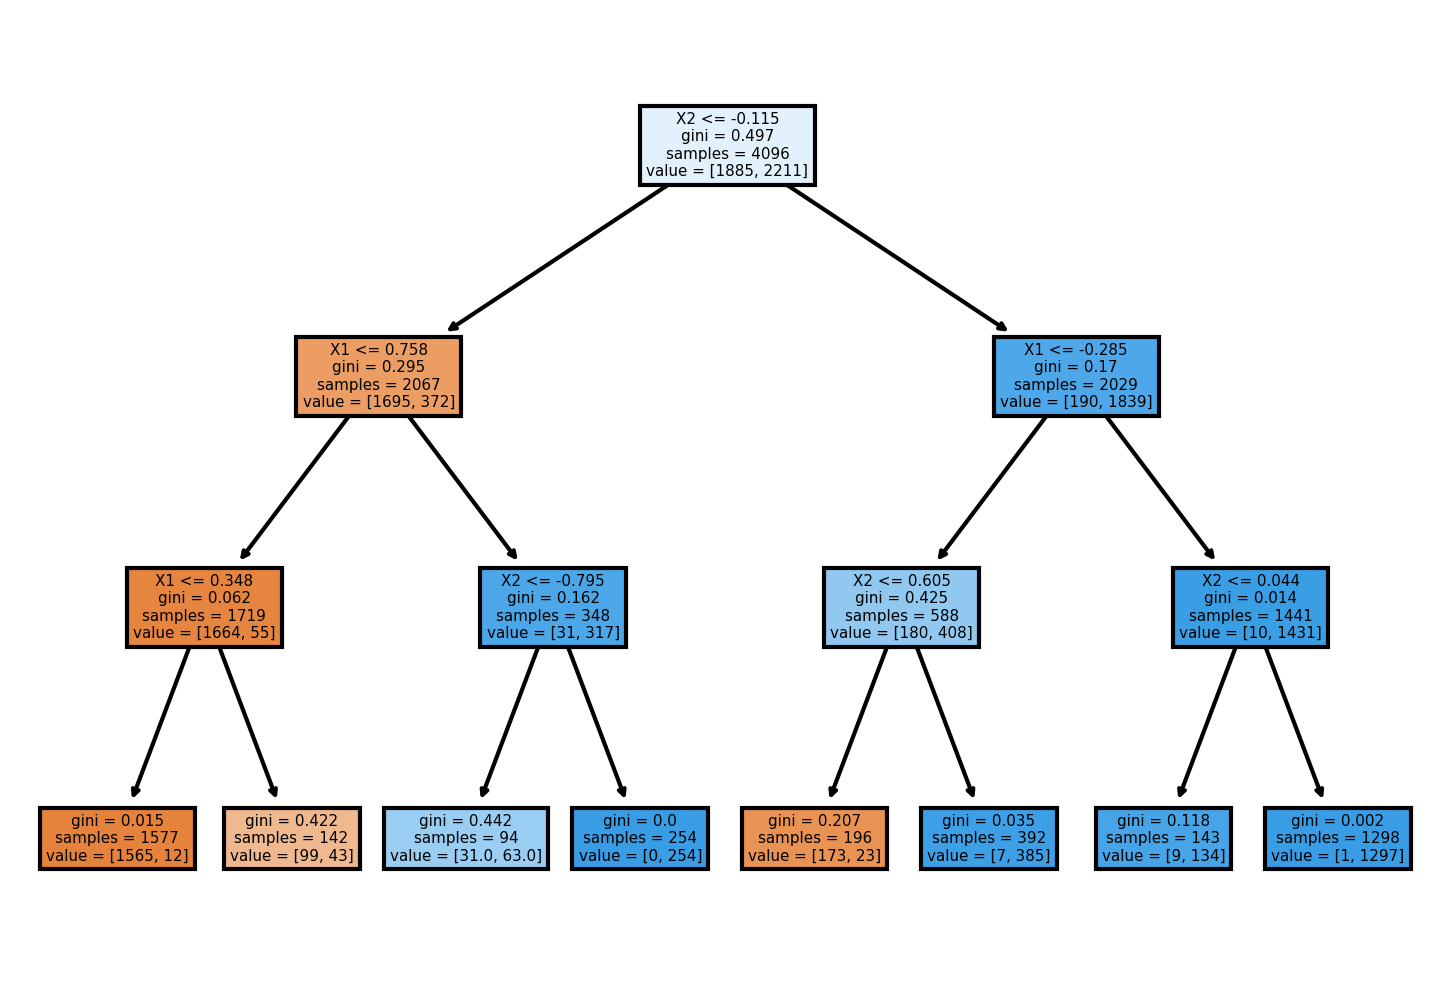

Decision Tree Accuracy: 0.96923828125


In [41]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(EngyTime, kmeans_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=EngyTime.columns)
plt.show()
y_pred = dt.predict(EngyTime)
print('Decision Tree Accuracy:', accuracy_score(kmeans_labels, y_pred))


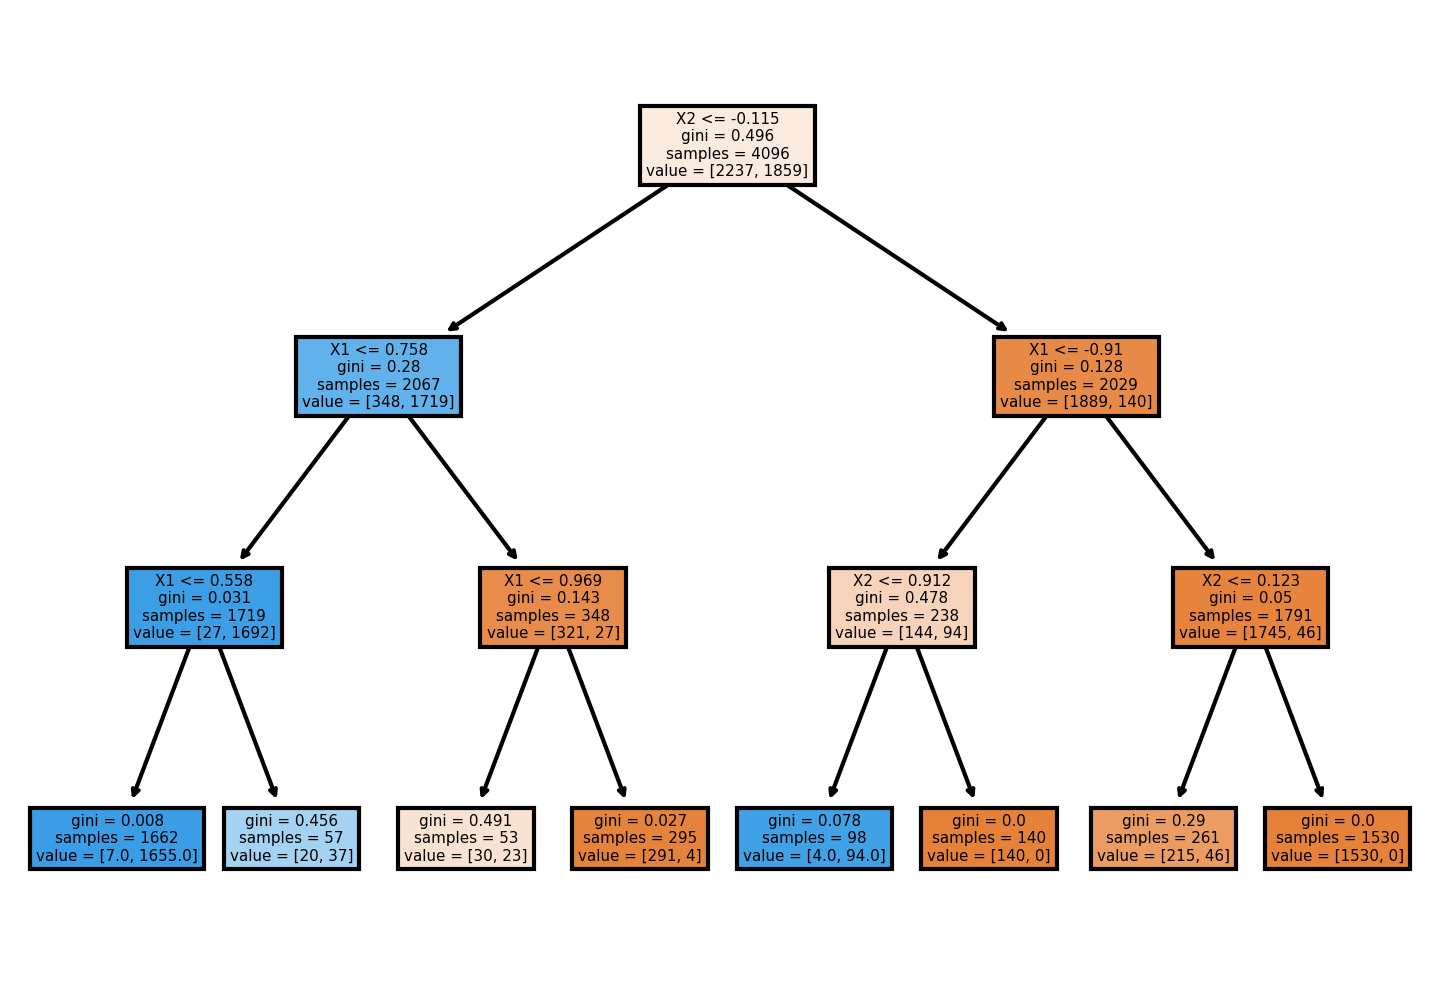

Decision Tree Accuracy: 0.974609375


In [42]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(EngyTime, agg_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=EngyTime.columns)
plt.show()
y_pred = dt.predict(EngyTime)
print('Decision Tree Accuracy:', accuracy_score(agg_labels, y_pred))

# RIPPER

In [44]:
pos = 1
# cambiamos las etiquetas para que el positivo sea el cluster 0
kmeans_labels_pos = (kmeans_labels == pos).astype(int)
agg_labels_pos = (agg_labels == pos).astype(int)
# KMeans
ripper = lw.RIPPER()
df = pd.concat([EngyTime, pd.DataFrame(kmeans_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(EngyTime)
print('RIPPER Accuracy KMeans:', accuracy_score(kmeans_labels_pos, y_pred))
# Agglomerative
ripper = lw.RIPPER()
df = pd.concat([EngyTime, pd.DataFrame(agg_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(EngyTime)
print('RIPPER Accuracy Agglomerative:', accuracy_score(agg_labels_pos, y_pred))

[[X1=>1.33] V [X2=0.91-1.38^X1=0.18-0.47] V [X2=>1.38] V [X2=0.55-0.91^X1=0.47-0.82] V [X1=0.82-1.33^X2=0.2-0.55] V [X2=0.91-1.38] V [X2=0.55-0.91^X1=0.82-1.33] V [X2=0.55-0.91^X1=0.18-0.47] V [X2=0.2-0.55^X1=0.47-0.82] V [X1=0.82-1.33^X2=-0.13-0.2] V [X2=0.55-0.91^X1=-0.084-0.18] V [X2=0.2-0.55^X1=0.18-0.47] V [X1=0.82-1.33^X2=-0.39--0.13] V [X2=0.55-0.91^X1=-0.31--0.084] V [X2=-0.13-0.2^X1=0.47-0.82] V [X2=0.2-0.55^X1=-0.084-0.18] V [X2=0.55-0.91^X1=-0.56--0.31] V [X2=-0.13-0.2^X1=-0.084-0.18] V [X1=0.82-1.33^X2=-0.64--0.39] V [X1=0.47-0.82^X2=-0.39--0.13] V [X2=0.2-0.55^X1=-0.31--0.084] V [X1=0.18-0.47^X2=-0.13-0.2] V [X2=0.55-0.91^X1=-0.86--0.56] V [X1=0.47-0.82^X2=-0.64--0.39] V [X2=0.2-0.55^X1=-0.56--0.31] V [X1=0.18-0.47^X2=-0.39--0.13] V [X1=0.82-1.33^X2=-0.9--0.64]]
RIPPER Accuracy KMeans: 0.98974609375
[[X2=<-1.21^X1=<-1.21] V [X2=-1.21--0.9^X1=-1.21--0.86] V [X2=-0.9--0.64^X1=-0.56--0.31] V [X2=<-1.21^X1=-1.21--0.86] V [X2=-1.21--0.9^X1=-0.56--0.31] V [X2=-0.9--0.64^X1=-1.21

## DSClustering

In [33]:
cdsgd = DSClustering(data=EngyTime,cluster=2)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD con 2 clusters', 'labels': cdsgd_labels})

Optimization started
Processing epoch	373	0.0019	
Training time: 170.98s, epochs: 400

Least training loss reached: 0.002


In [39]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.435] R13: X2 > 0.644
			0: 0.435	1: 0.000	Unc: 0.565

	[0.266] R9: X1 > 0.659
			0: 0.266	1: 0.000	Unc: 0.734

Most important rules for Cluster 1

	[0.419] R10: X2 < -0.698
			0: 0.000	1: 0.419	Unc: 0.581

	[0.416] R6: X1 < -0.654
			0: 0.000	1: 0.416	Unc: 0.584


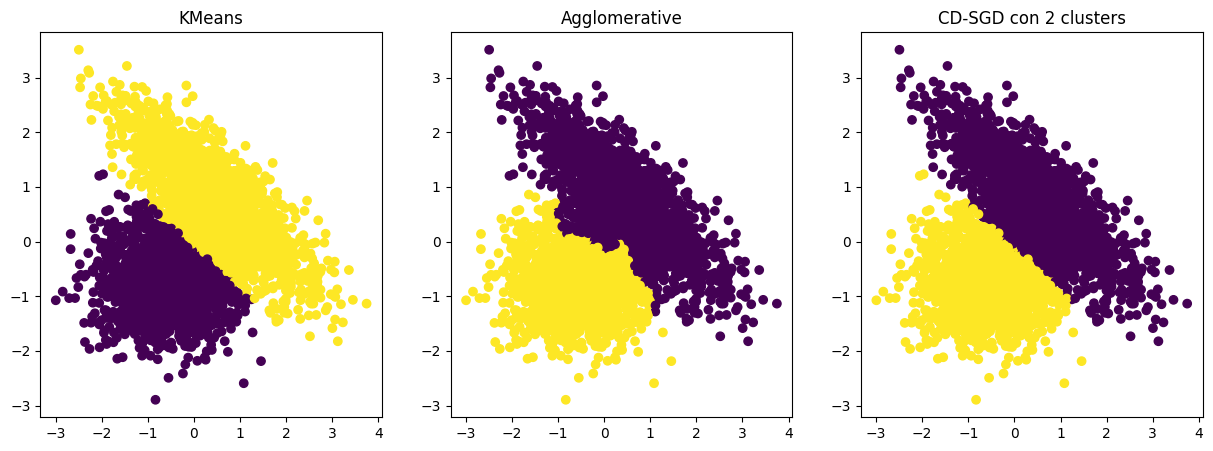

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    ax[i].scatter(EngyTime.iloc[:, 0], EngyTime.iloc[:, 1], c=model['labels'], cmap='viridis')
    ax[i].set_title(model['name'])
plt.show()